In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/mnt/data2/SDO-AIA/timeseries.csv')

In [3]:
print(data.head())

   Unnamed: 0        94        131        171        193        211       304  \
0           0  3.606061  11.505706  246.72783  371.50107  187.19606  9.111468   
1           1  3.612700  11.516360  248.65991  372.03784  186.97496  9.171742   
2           2  3.643073  11.492891  248.62538  372.06950  187.79219  9.120575   
3           3  3.632370  11.528946  246.26512  372.34787  187.56985  9.114806   
4           4  3.623632  11.563996  246.78719  372.13086  187.32040  9.182921   

             timestamp  
0  2023-07-01 00:00:00  
1  2023-07-01 00:01:00  
2  2023-07-01 00:02:00  
3  2023-07-01 00:03:00  
4  2023-07-01 00:04:00  


In [4]:
removed = pd.read_csv('/mnt/data2/SDO-AIA/removed.csv')

In [5]:
print(removed.head())

   Unnamed: 0                      File
0           0  2023-07-28T08:00:00.fits
1           1  2023-07-25T07:52:00.fits
2           2  2023-07-23T21:35:00.fits
3           3  2023-07-05T21:00:00.fits
4           4  2023-07-26T06:43:00.fits


In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

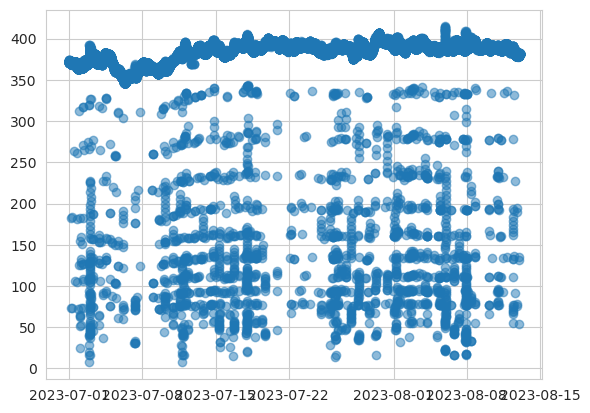

In [57]:
plt.scatter(data['timestamp'], data['193'], label='Original SXR Data', alpha=0.5)
#plt.ylim(0,8)

In [24]:
from sunpy.map import Map
import glob

In [53]:
datathresh = data[data['193']<8]

In [54]:
datathresh

,Unnamed: 0,94,131,171,193,211,304,timestamp
2816,2816,3.888169,19.117615,241.85805,7.418472,194.44656,10.207174,2023-07-02 23:02:00
15460,15460,4.552169,13.401328,244.95663,7.302078,199.02501,10.384794,2023-07-11 18:08:00


In [74]:
smap = Map("/mnt/data2/SDO-AIA_bad/removed_files/193/2023-07-11T18:08:00.fits")

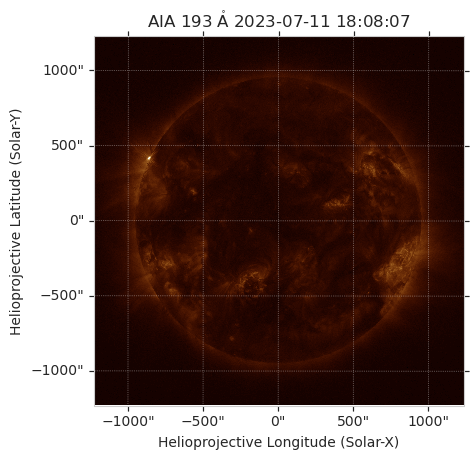

In [75]:
smap.plot()

In [39]:
smap.meta['exptime']

2.901327

In [76]:
from itipy.data.editor import LoadMapEditor, NormalizeRadiusEditor, MapToDataEditor
import numpy as np

def get_mean_intensity(filepath):
    s_map, _ = LoadMapEditor().call(filepath)
    s_map = NormalizeRadiusEditor(512).call(s_map)
    #data, _ = MapToDataEditor().call(s_map)
    return s_map

In [77]:
x = get_mean_intensity("/mnt/data2/SDO-AIA_bad/removed_files/193/2023-07-11T18:08:00.fits")

In [78]:
x.data.shape

(512, 512)

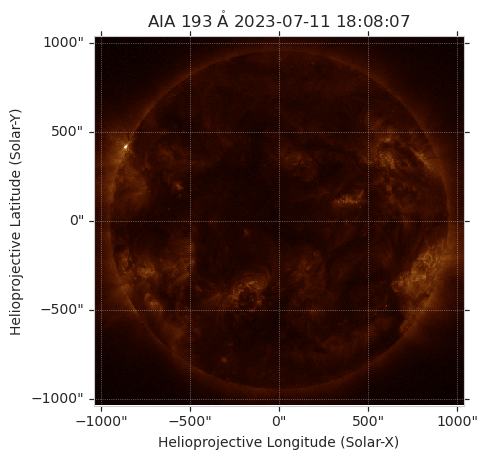

In [79]:
x.plot()

In [80]:
x.meta['exptime']

0.148491